### `SHASHWAT VAIBHAV   `
### `ATISH GHOSH        `

# Part 1a --> Loading and preprocessing the text data

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from nltk.corpus import stopwords 

### `The data has been provided as text file 'yelp_labelled.txt' `

In [2]:
#Let's read the data and see what is inside
with open('yelp_labelled.txt') as tfile:
    print(tfile.read())

Wow... Loved this place.	1
Crust is not good.	0
Not tasty and the texture was just nasty.	0
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.	1
The selection on the menu was great and so were the prices.	1
Now I am getting angry and I want my damn pho.	0
Honeslty it didn't taste THAT fresh.)	0
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.	0
The fries were great too.	1
A great touch.	1
Service was very prompt.	1
Would not go back.	0
The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.	0
I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!	1
I was disgusted because I was pretty sure that was human hair.	0
I was shocked because no signs indicate cash only.	0
Highly recommended.	1
Waitress was a little slow in service.	0
This place is not worth your time, let alone Vegas.	0
did not like at all.	0
The Burrittos Blah!	0
The food, amazin

In [3]:
df = pd.read_csv('yelp_labelled.txt', names=['Review','Type'], sep='\t')

In [4]:
df.head()

,Review,Type
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


#### `Type denotes the label of the review.`
> `if Type is 0, Label is negative`<br/>
> `if Type is 1, Label is positive`

In [5]:
## Any  NaN values??
df.isnull().sum()

Review    0
Type      0
dtype: int64

#### No missing value present as such

In [6]:
##Let's find out the number of negative and positive reviews
print("Total Number of reviews:",len(df))
print('Number of Positive type of reviews:', len(df[df['Type']==1]))
print('Number of Negative type of reviews:', len(df[df['Type']==0]))

Total Number of reviews: 1000
Number of Positive type of reviews: 500
Number of Negative type of reviews: 500


<AxesSubplot:xlabel='Type', ylabel='count'>

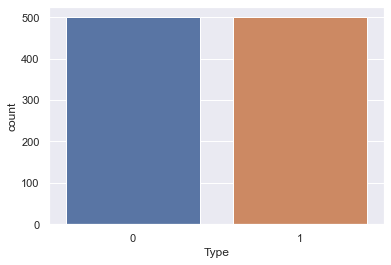

In [7]:
##Let's visualize the negative and positive reviews
sns.set_theme(style='darkgrid')
sns.countplot(x='Type',data=df)

In [8]:
#Alternatively, the previous step could be done this way
df['Type'].value_counts()

0    500
1    500
Name: Type, dtype: int64

### `So we have equal number of positive and negative reviews among the 1000 reviews`

In [9]:
#cleaning the reviews by removing punctuation
def remove_punctuation(textstring):
    after_removal = ''.join(char for char in textstring if char not in (string.punctuation))
    return after_removal

df['Review'] = df['Review'].apply(remove_punctuation)

In [10]:
df.head()

,Review,Type
0,Wow Loved this place,1
1,Crust is not good,0
2,Not tasty and the texture was just nasty,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
#for text in df['Review']:
#    print(text)

#### Punctuations have been removed from the reviews.

In [12]:
## Let's convert all the reviews to lower case
def tolower(textstring):
    lowercase_string = ''.join(str.lower(char) for char in textstring)
    return lowercase_string

df['Review'] = df['Review'].apply(tolower)

#### All reviews have been converted to lower case

In [13]:
df.head()

,Review,Type
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [14]:
#Tokenizing the reviews and removing stopwords
tokenized_feat =[]
for review in df['Review']:
    x = review.split()
    tokenized_feat.append(x)

df['Review'] = tokenized_feat

In [15]:
#reviews have been tokenized
df.head()

,Review,Type
0,"[wow, loved, this, place]",1
1,"[crust, is, not, good]",0
2,"[not, tasty, and, the, texture, was, just, nasty]",0
3,"[stopped, by, during, the, late, may, bank, ho...",1
4,"[the, selection, on, the, menu, was, great, an...",1


In [16]:
#Now, Let's remove stopwords
nltk.download('stopwords')
common_words = stopwords.words('english')
common_words[0:6]

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


['i', 'me', 'my', 'myself', 'we', 'our']

In [17]:
removed_stopped_word = []
for tokenized_review in df['Review']:
    emptyList = []
    for x in tokenized_review:
        if x not in common_words:
            emptyList.append(x)
    
    removed_stopped_word.append(emptyList)


In [18]:
df['Review'] = removed_stopped_word

In [19]:
df.head()

,Review,Type
0,"[wow, loved, place]",1
1,"[crust, good]",0
2,"[tasty, texture, nasty]",0
3,"[stopped, late, may, bank, holiday, rick, stev...",1
4,"[selection, menu, great, prices]",1


### `Stop Words have also been removed from the Reviews`

# Part 1b --> splitting into test and train 
# Creating vocabulary to design `Feature Matrix` 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
feature_vector = df['Review']
target_vector  = df['Type']

In [22]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(feature_vector, target_vector, train_size=0.8, random_state=51)

### `Creating Vocabulary for Training set "Xtrain" `

In [23]:
## how does Xtrain looks like??
Xtrain.tail()

709    [mean, really, get, famous, fish, chips, terri...
969    [dont, know, big, deal, place, wont, back, yaall]
736         [friends, pasta, also, bad, barely, touched]
485    [isnt, small, family, restaurant, fine, dining...
57      [much, seafood, like, 5, strings, pasta, bottom]
Name: Review, dtype: object

In [24]:
#create an empty set for unique words in train data
unique_words_train = set()

for instance in Xtrain:
    ##instances are themselves tokenized and preprocessed lists
    unique_words_train.update(instance)

In [25]:
unique_words_train.update(['<UKN>'])
#WHY did I create this extra word??? To handle unmatching words in Test data

In [26]:
len(unique_words_train)
#print(unique_words_train)

1724

### So total of 1723 unique words in training data + < UKN > to handle test data

#### Now we have to create a feature matrix M where every (d,w)th entry gives word count/frequency of word `w` in document `d`
#### We will be having `d` rows for number of documents, i.e, number of  rows in Xtrain: (len(Xtrain))

In [27]:
##Let's create the matrix
len(Xtrain)

800

In [28]:
##we have 800 documents in Training set
##Lets create a 2d List
vocab_length = len(unique_words_train)
vocab = list(unique_words_train) ##  converted a set to a list
List = []
for reviews in Xtrain:
    innerList = [0]*vocab_length #created a empty list of required length with all zeros
    for x in reviews:
        pos = vocab.index(x)
        innerList[pos] = innerList[pos] + 1
    
    List.append(innerList)
        
        

In [29]:
matrix_2d_train = np.array(List)
print("Shape of the feature matrix for training data is:", matrix_2d_train.shape)
matrix_2d_train

Shape of the feature matrix for training data is: (800, 1724)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### `We  do have created a feature matrix for every document d  in Xtrain`

In [30]:
## Let's create a dataframe from the feature matrix for training data
train_df = pd.DataFrame(data=matrix_2d_train, columns=vocab)
train_df.head()

,times,never,capers,cakes,potatoes,somewhat,thru,steiners,remember,binge,...,mediocre,rare,atrocious,return,youll,even,truly,party,hole,bloddy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### It is evident that our feature matrix is sparse.
#### So far we have created the feature matrix for train test --> `matrix_2d_train` which is stored in dataframe `train_df`
#### The correspoding labels are stored in `Ytrain`

### Similarly we will be forming a 2d_feature matrix for test set as well

In [31]:
##vocab_length already been defined
##vocab list already been defined
List = []
for reviews in Xtest:
    innerList = [0]*vocab_length
    for x in reviews:
        if x not in vocab:
            pos = vocab.index('<UKN>')
        else:
            pos = vocab.index(x)
            
        innerList[pos] = innerList[pos]+1
    
    List.append(innerList)
    


In [32]:
matrix_2d_test = np.array(List)
print("Shape of the feature matrix for test data is:", matrix_2d_test.shape)
matrix_2d_test


Shape of the feature matrix for test data is: (200, 1724)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
## Also create dataframe  for test/validation data from the matrix
test_df = pd.DataFrame(data=matrix_2d_test, columns=vocab)#vocab was created from training data
test_df.head()

,times,never,capers,cakes,potatoes,somewhat,thru,steiners,remember,binge,...,mediocre,rare,atrocious,return,youll,even,truly,party,hole,bloddy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### `Test data feature matrix is also sparse. Corresponding labels have been stored in Ytest`

# Part 1c--> Implementing multinomial Naive Bayes and adding alpha smoothening
# Part 1d -> Accuracy and  F1 scores of train and test sets

In [34]:
## what info we do have till now?
#matrix_2d_train, matrix_2d_test, train_df, test_df, Ytrain, Ytest
from sklearn.naive_bayes import MultinomialNB

In [35]:
model = MultinomialNB()
model.fit(train_df, Ytrain)

MultinomialNB()

In [36]:
predicted = model.predict(test_df)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(Ytest,predicted))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       101
           1       0.75      0.84      0.79        99

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [41]:
#with smootheing of add-1
train_accuracy = model.score(train_df,Ytrain)
test_accuracy  = model.score(test_df, Ytest)
print('Train accuracy is {} %'.format(train_accuracy*100))
print('Test accuracy is {} %'.format(test_accuracy*100))

Train accuracy is 95.625 %
Test accuracy is 78.0 %


In [40]:
##Without adding smoothening
model_w = MultinomialNB(alpha=0)
model_w.fit(train_df, Ytrain)
predicted_w = model_w.predict(test_df)
print(classification_report(Ytest,predicted_w))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       101
           1       0.78      0.79      0.78        99

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200



C:\Users\Shashwat\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [42]:
train_accuracy_w = model_w.score(train_df,Ytrain)
test_accuracy_w  = model_w.score(test_df, Ytest)
print('Train accuracy is {} %'.format(train_accuracy_w*100))
print('Test accuracy is {} %'.format(test_accuracy_w*100))

Train accuracy is 97.625 %
Test accuracy is 78.5 %


In [3]:
A=[1,2,3]
A[:len(A)-1]

[1, 2]